# USD/TRY Exchange Rate Forecasting - Time Series Project

## 1. Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

## 2. Load Data

In [5]:
df = pd.read_csv("usd_try_sample_data.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)
df = df.asfreq("D")  # Set daily frequency
print(df)

              USD_TRY
Date                 
2020-01-01   6.069671
2020-01-02   6.075845
2020-01-03   6.160614
2020-01-04   6.332917
2020-01-05   6.329501
...               ...
2023-12-27  41.497343
2023-12-28  41.555459
2023-12-29  41.704434
2023-12-30  41.791752
2023-12-31  41.797906

[1461 rows x 1 columns]


In [6]:
df = df.fillna(method="ffill")  # Fill missing values

C:\Users\DELL\AppData\Local\Temp\ipykernel_21708\820934862.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")  # Fill missing values


## 3. Data Visualization

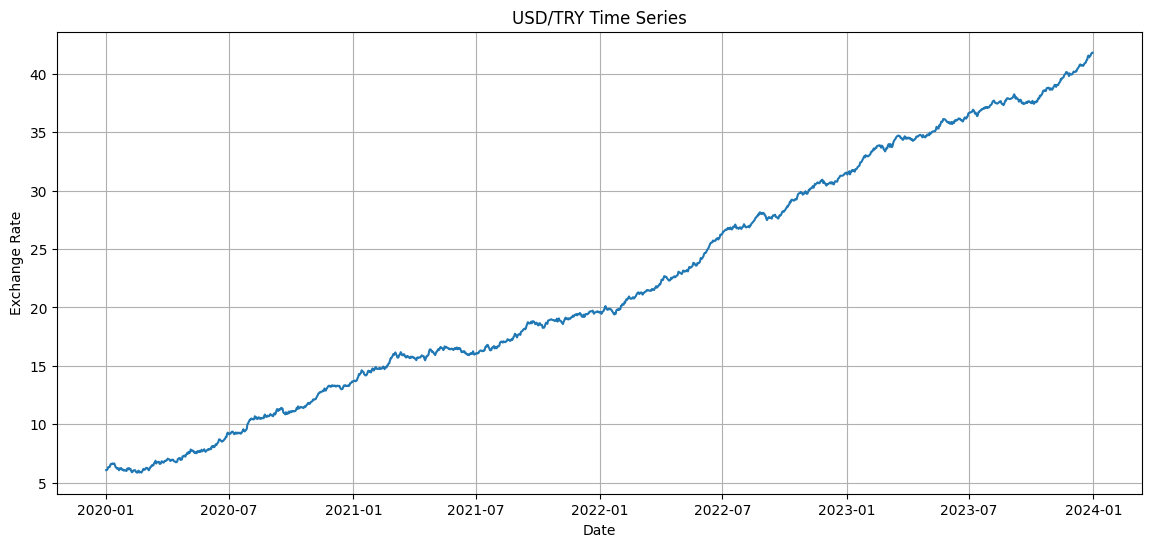

In [7]:
plt.figure(figsize=(14,6))
plt.plot(df["USD_TRY"])
plt.title("USD/TRY Time Series")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid()
plt.show()

## 4. Split Data into Train and Test Sets

In [8]:
train = df[:'2022-12-31']
test = df['2023-01-01':]

## 5. Fit ARIMA Model

In [10]:
model = ARIMA(train, order=(5,1,0))  # You can optimize these parameters
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                USD_TRY   No. Observations:                 1096
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 971.749
Date:                Thu, 17 Apr 2025   AIC                          -1931.498
Time:                        10:35:50   BIC                          -1901.507
Sample:                    01-01-2020   HQIC                         -1920.150
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0370      0.031      1.193      0.233      -0.024       0.098
ar.L2          0.0476      0.032      1.512      0.131      -0.014       0.109
ar.L3          0.0571      0.031      1.816      0.0

## 6. Make Forecast

In [12]:
forecast = model_fit.forecast(steps=len(test))
test.loc[:, "Predicted"] = forecast.values


## 7. Visualize Forecast Results

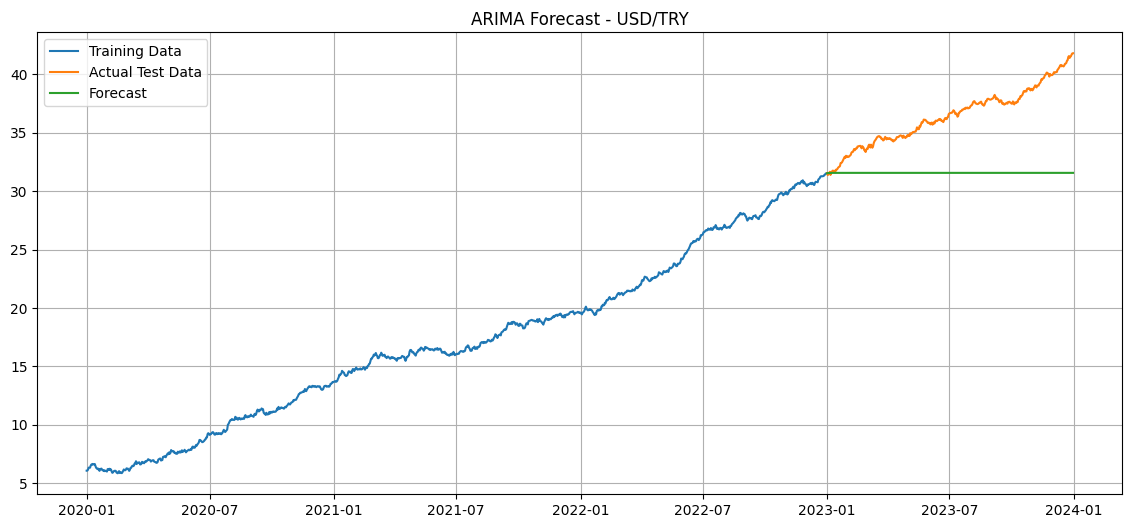

In [13]:
plt.figure(figsize=(14,6))
plt.plot(train.index, train["USD_TRY"], label="Training Data")
plt.plot(test.index, test["USD_TRY"], label="Actual Test Data")
plt.plot(test.index, test["Predicted"], label="Forecast")
plt.title("ARIMA Forecast - USD/TRY")
plt.legend()
plt.grid()
plt.show()


## 8. Model Performance

In [14]:
rmse = sqrt(mean_squared_error(test["USD_TRY"], test["Predicted"]))
print(f"RMSE: {rmse:.4f}")

RMSE: 5.4276
